IMPORT LIBRARIES AND DATA

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Set professional style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [2]:
# Import data 
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\work1\superstore2\SuperStoreOrders.csv")
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


CLEAN DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Convert order_date to the datetime format
df["order_date"] = df["order_date"].str.replace("/", "-")
df["order_date"] = pd.to_datetime(df['order_date'],format='%d-%m-%Y')

# Convert ship_date to the date-time format
df["ship_date"] = df["ship_date"].str.replace("/", "-")
df["ship_date"] = pd.to_datetime(df['ship_date'],format='%d-%m-%Y')

In [6]:
# Create additional date columns
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["order_quarter"] = df["order_date"].dt.quarter
df["order_day"] = df["order_date"].dt.day_name()
df["delivery_duration"] = (df["ship_date"] - df["order_date"]).dt.days

In [13]:
# Convert df["sales"] to float 
df["sales"] = df["sales"].str.replace(",","").astype(float)
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,discount,profit,shipping_cost,order_priority,year,order_year,order_month,order_quarter,order_day,delivery_duration
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,0.0,106.140,35.46,Medium,2011,2011,1,1,Saturday,5
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,36.036,9.72,Medium,2011,2011,1,1,Saturday,7
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,0.0,29.640,8.17,High,2011,2011,1,1,Saturday,4
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,0.5,-26.055,4.82,High,2011,2011,1,1,Saturday,4
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,37.770,4.70,Medium,2011,2011,1,1,Saturday,7


PERFORM EXPLORATORY DATA ANALYSIS

In [15]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year,order_year,order_month,order_quarter,delivery_duration
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208,2012.777208,7.522636,2.793235,3.969370
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,2011.000000,1.000000,1.000000,0.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000,2012.000000,5.000000,2.000000,3.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000,2013.000000,8.000000,3.000000,4.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000,2014.000000,10.000000,4.000000,5.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000,2014.000000,12.000000,4.000000,7.000000
std,NaN,NaN,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931,1.098931,3.300056,1.066015,1.729437


✓ Saved: superstore_overview_dashboard.png


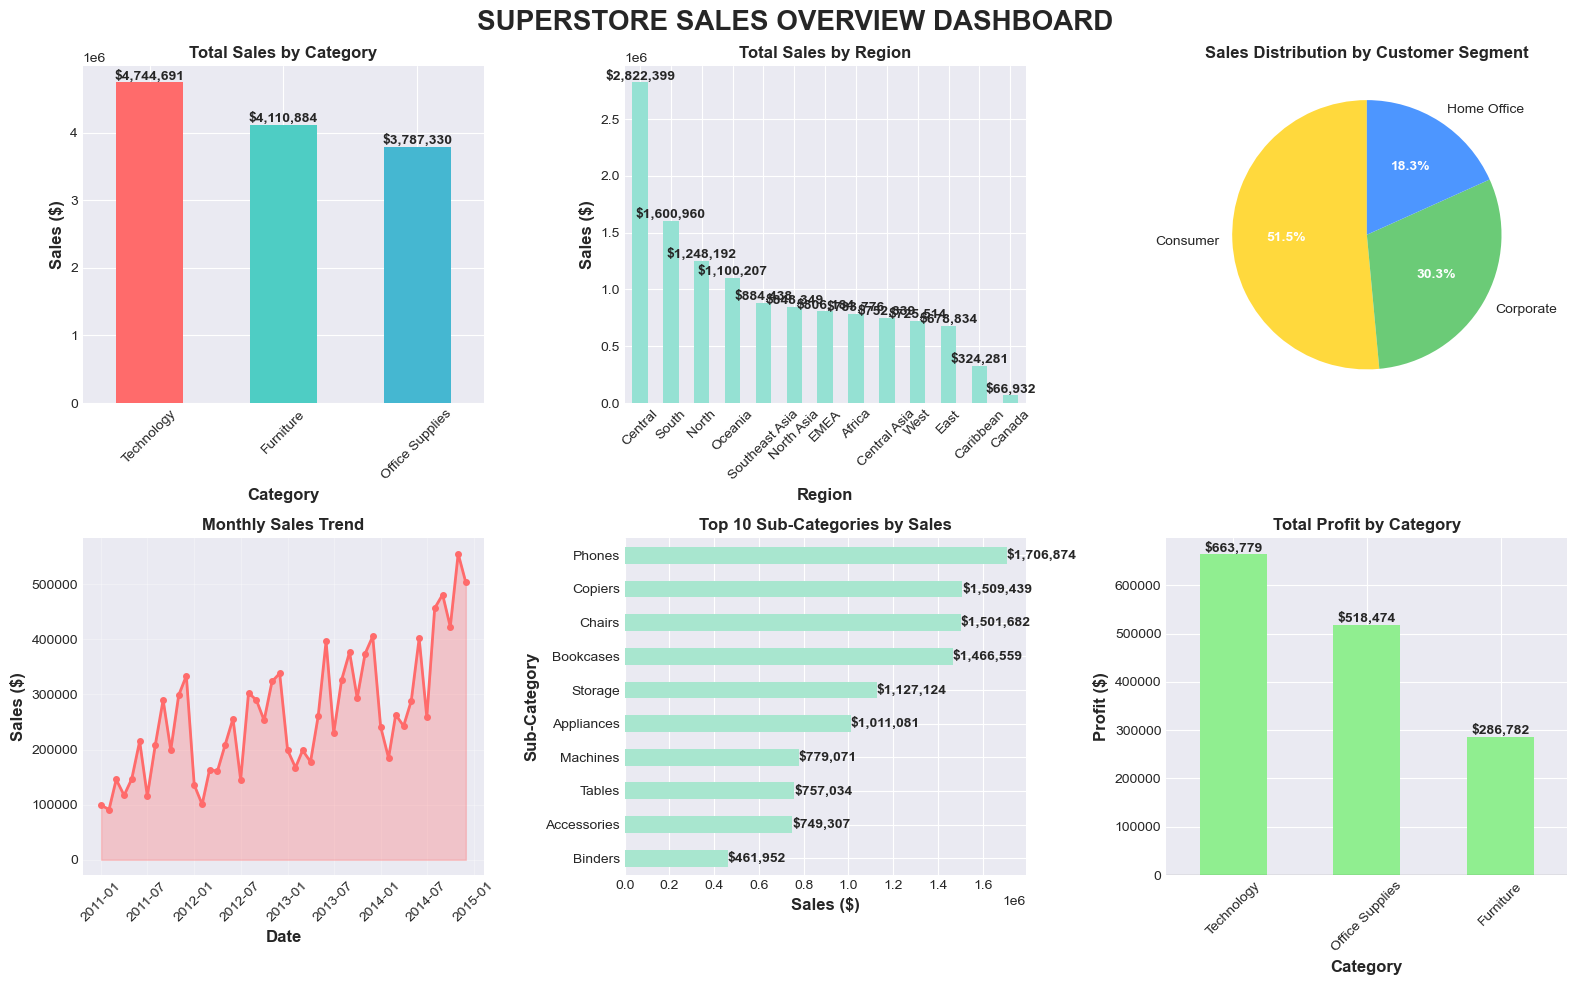

In [67]:
# Sales Analysis
fig = plt.figure(figsize=(16, 10))
fig.suptitle('SUPERSTORE SALES OVERVIEW DASHBOARD', fontsize=20, fontweight='bold', y=0.98)

# Total Sales by Category
ax1 = plt.subplot(2, 3, 1)
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
category_sales.plot(kind='bar', color=colors, ax=ax1)
ax1.set_title('Total Sales by Category', fontweight='bold', fontsize=12)
ax1.set_xlabel('Category', fontweight='bold')
ax1.set_ylabel('Sales ($)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(category_sales.values):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

#  Sales by Region
ax2 = plt.subplot(2, 3, 2)
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='#95E1D3', ax=ax2)
ax2.set_title('Total Sales by Region', fontweight='bold', fontsize=12)
ax2.set_xlabel('Region', fontweight='bold')
ax2.set_ylabel('Sales ($)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(region_sales.values):
    ax2.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Sales by Customer Segment (Pie Chart)
ax3 = plt.subplot(2, 3, 3)
segment_sales = df.groupby('segment')['sales'].sum()
colors_pie = ['#FFD93D', '#6BCB77', '#4D96FF']
wedges, texts, autotexts = ax3.pie(segment_sales.values, labels=segment_sales.index, 
                                     autopct='%1.1f%%', colors=colors_pie, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax3.set_title('Sales Distribution by Customer Segment', fontweight='bold', fontsize=12)

# Monthly Sales Trend
ax4 = plt.subplot(2, 3, 4)
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
ax4.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, 
         markersize=4, color='#FF6B6B')
ax4.fill_between(monthly_sales.index, monthly_sales.values, alpha=0.3, color='#FF6B6B')
ax4.set_title('Monthly Sales Trend', fontweight='bold', fontsize=12)
ax4.set_xlabel('Date', fontweight='bold')
ax4.set_ylabel('Sales ($)', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# Top 10 Sub-Categories
ax5 = plt.subplot(2, 3, 5)
top_subcats = df.groupby('sub_category')['sales'].sum().nlargest(10).sort_values()
top_subcats.plot(kind='barh', color='#A8E6CF', ax=ax5)
ax5.set_title('Top 10 Sub-Categories by Sales', fontweight='bold', fontsize=12)
ax5.set_xlabel('Sales ($)', fontweight='bold')
ax5.set_ylabel('Sub-Category', fontweight='bold')
for i, v in enumerate(top_subcats.values):
    ax5.text(v, i, f'${v:,.0f}', ha='left', va='center', fontweight='bold')

# Profit by Category
ax6 = plt.subplot(2, 3, 6)
category_profit = df.groupby('category')['profit'].sum().sort_values(ascending=False)
colors_profit = ['#90EE90' if x > 0 else '#FFB6B6' for x in category_profit.values]
category_profit.plot(kind='bar', color=colors_profit, ax=ax6)
ax6.set_title('Total Profit by Category', fontweight='bold', fontsize=12)
ax6.set_xlabel('Category', fontweight='bold')
ax6.set_ylabel('Profit ($)', fontweight='bold')
ax6.tick_params(axis='x', rotation=45)
ax6.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
for i, v in enumerate(category_profit.values):
    ax6.text(i, v, f'${v:,.0f}', ha='center', 
             va='bottom' if v > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.savefig('superstore_overview_dashboard.png', dpi=300, bbox_inches='tight')
print("✓ Saved: superstore_overview_dashboard.png")
plt.show()



INVENTORY SPECIFIC ANALYSIS

In [ ]:
# Product velocity (fast moving vs slow moving)
product_velocity = df.groupby("product_name").agg({
    "quantity": "sum",
    "sales": "sum",
    "order_id": "count"
}).round(2)
product_velocity.columns =["total_quantity_sold", "total_sales", "number_of_orders"]

In [53]:
#Fast moving items
product_velocity.sort_values('total_quantity_sold', ascending=False).head(10)

,total_quantity_sold,total_sales,number_of_orders
product_name,,,
Staples,876,7009.0,227
"Cardinal Index Tab, Clear",337,1922.0,92
"Eldon File Cart, Single Width",321,34392.0,90
"Rogers File Cart, Single Width",262,29467.0,84
"Sanford Pencil Sharpener, Water Color",259,5581.0,80
"Stockwell Paper Clips, Assorted Sizes",253,2404.0,65
"Avery Index Tab, Clear",252,1314.0,74
"Ibico Index Tab, Clear",251,1808.0,83
"Smead File Cart, Single Width",250,25397.0,77


In [55]:
# Slow moving items
product_velocity.sort_values('total_quantity_sold', ascending=True).head(10)

,total_quantity_sold,total_sales,number_of_orders
product_name,,,
Penpower WorldCard Pro Card Scanner,1,91.0,1
Boston 1900 Electric Pencil Sharpener,1,15.0,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,120.0,1
"Chromcraft Training Table, Adjustable Height",1,38.0,1
Xerox 20,1,6.0,1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,207.0,1
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,2,2.0,1
Avery 5,2,6.0,1
Xerox 1984,2,13.0,1


In [61]:
# Seasonality Analysis
seasonal = df.groupby(["order_year","order_quarter"]).agg({
    "sales": "sum",
    "quantity": "sum"
})
seasonal

sales  quantity
order_year order_quarter                     
2011       1               335780.0      4523
           2               478903.0      7145
           3               613318.0      8516
           4               831510.0     11259
2012       1               399388.0      5555
           2               625611.0      8842
           3               737795.0     10344
           4               914699.0     13370
2013       1               565035.0      7201
           2               834873.0     11823
           3               933057.0     13979
           4              1072895.0     15133
2014       1               689225.0      9326
           2               933028.0     13903
           3              1196537.0     16298
           4              1481251.0     21095

✓ Saved: superstore_inventory_analysis.png


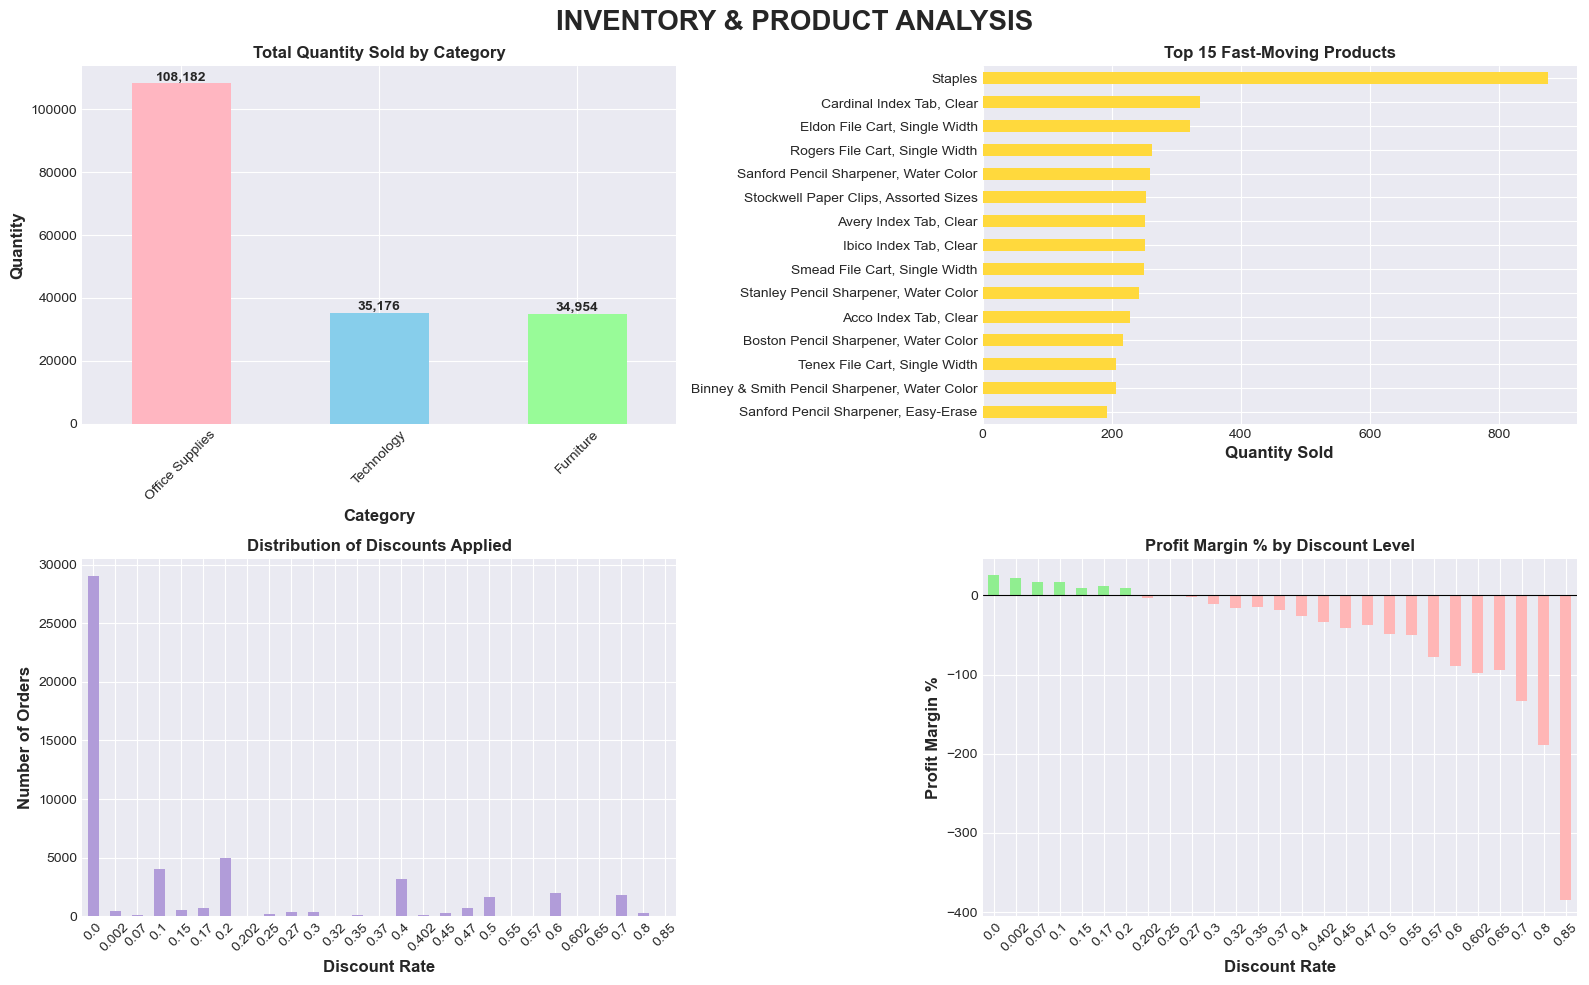

In [81]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('INVENTORY & PRODUCT ANALYSIS', fontsize=20, fontweight='bold', y=0.98)

# Quantity Sold by Category
ax1 = plt.subplot(2, 2, 1)
category_qty = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
category_qty.plot(kind='bar', color=['#FFB6C1', '#87CEEB', '#98FB98'], ax=ax1)
ax1.set_title('Total Quantity Sold by Category', fontweight='bold', fontsize=12)
ax1.set_xlabel('Category', fontweight='bold')
ax1.set_ylabel('Quantity', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(category_qty.values):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')


# Top 15 Products by Quantity
ax3 = plt.subplot(2, 2, 2)
top_products = df.groupby('product_name')['quantity'].sum().nlargest(15).sort_values()
top_products.plot(kind='barh', color='#FFD93D', ax=ax3)
ax3.set_title('Top 15 Fast-Moving Products', fontweight='bold', fontsize=12)
ax3.set_xlabel('Quantity Sold', fontweight='bold')
ax3.set_ylabel('')


# Discount Distribution
ax5 = plt.subplot(2, 2, 3)
discount_counts = df['discount'].value_counts().sort_index()
discount_counts.plot(kind='bar', color='#B19CD9', ax=ax5)
ax5.set_title('Distribution of Discounts Applied', fontweight='bold', fontsize=12)
ax5.set_xlabel('Discount Rate', fontweight='bold')
ax5.set_ylabel('Number of Orders', fontweight='bold')
ax5.tick_params(axis='x', rotation=45)

# Profit Margin by Discount Level
ax6 = plt.subplot(2, 2, 4)
discount_profit = df.groupby('discount').agg({'sales': 'sum', 'profit': 'sum'})
discount_profit['Margin'] = (discount_profit['profit'] / discount_profit['sales'] * 100)
colors_margin = ['#90EE90' if x > 0 else '#FFB6B6' for x in discount_profit['Margin'].values]
discount_profit['Margin'].plot(kind='bar', color=colors_margin, ax=ax6)
ax6.set_title('Profit Margin % by Discount Level', fontweight='bold', fontsize=12)
ax6.set_xlabel('Discount Rate', fontweight='bold')
ax6.set_ylabel('Profit Margin %', fontweight='bold')
ax6.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('superstore_inventory_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: superstore_inventory_analysis.png")
plt.show()

TIME SERIES ANALYSIS


✓ Saved: superstore_time_series.png


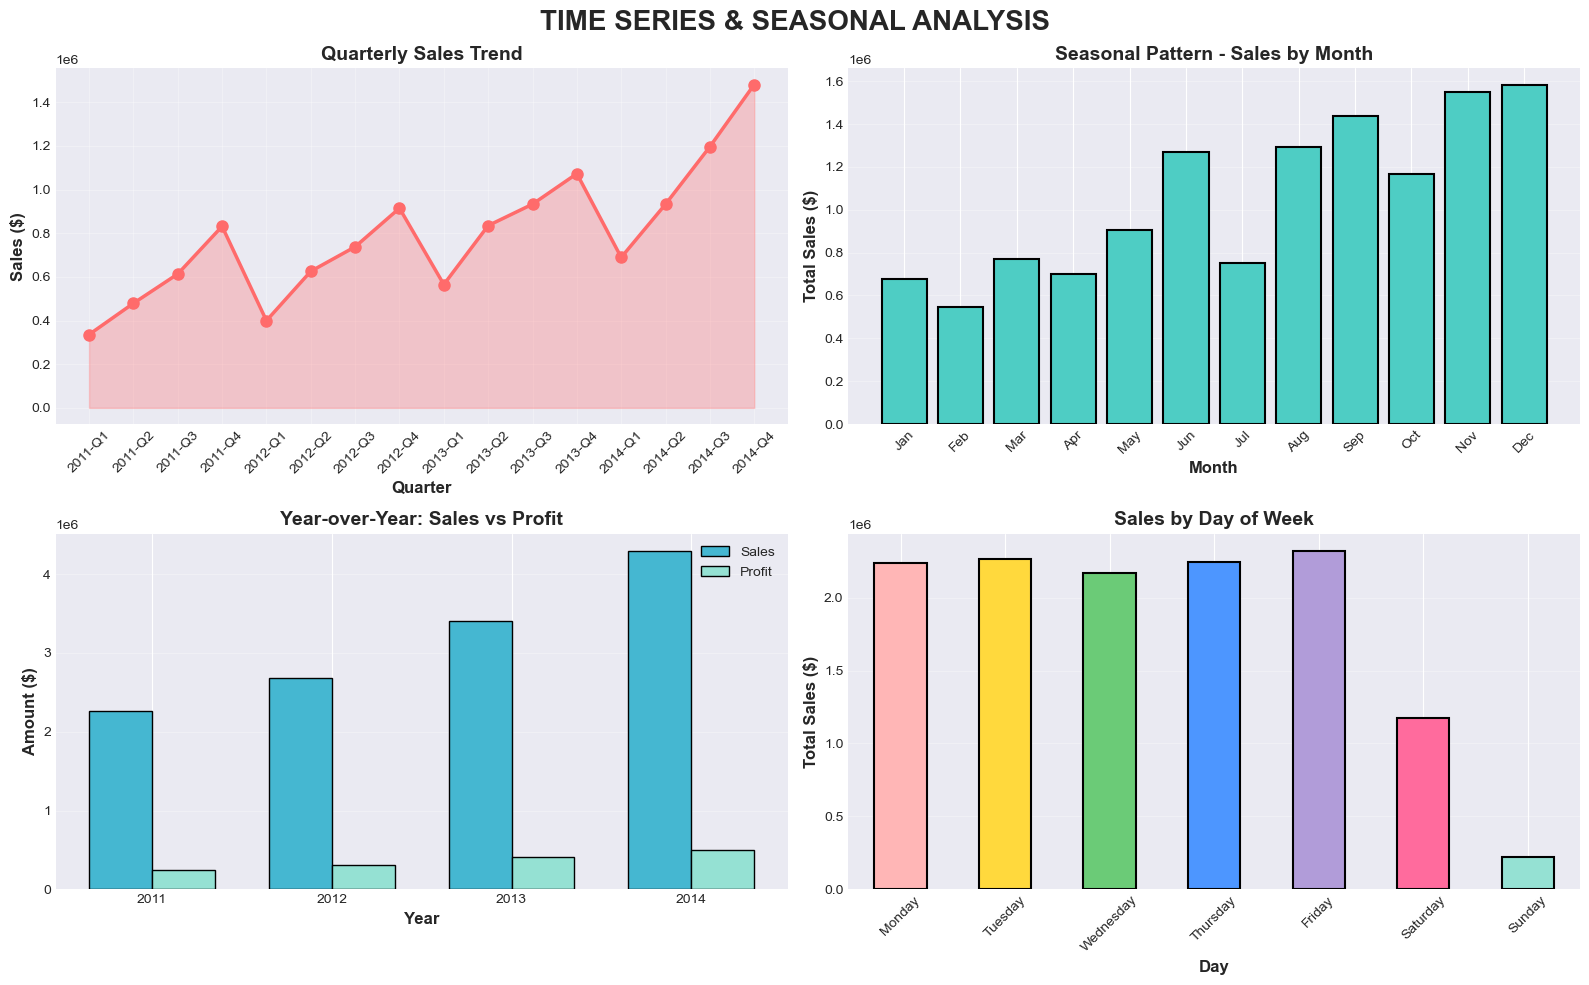

In [86]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('TIME SERIES & SEASONAL ANALYSIS', fontsize=20, fontweight='bold', y=0.98)

# Quarterly Sales Trend
ax1 = plt.subplot(2, 2, 1)
quarterly = df.groupby(['order_year', 'order_quarter'])['sales'].sum().reset_index()
quarterly['period'] = quarterly['order_year'].astype(str) + '-Q' + quarterly['order_quarter'].astype(str)
ax1.plot(quarterly['period'], quarterly['sales'], marker='o', linewidth=2.5, 
         markersize=8, color='#FF6B6B')
ax1.fill_between(range(len(quarterly)), quarterly['sales'], alpha=0.3, color='#FF6B6B')
ax1.set_title('Quarterly Sales Trend', fontweight='bold', fontsize=14)
ax1.set_xlabel('Quarter', fontweight='bold')
ax1.set_ylabel('Sales ($)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Sales by Month (Seasonal Pattern)
ax2 = plt.subplot(2, 2, 2)
monthly_pattern = df.groupby('order_month')['sales'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.bar(range(1, 13), monthly_pattern.values, color='#4ECDC4', edgecolor='black', linewidth=1.5)
ax2.set_title('Seasonal Pattern - Sales by Month', fontweight='bold', fontsize=14)
ax2.set_xlabel('Month', fontweight='bold')
ax2.set_ylabel('Total Sales ($)', fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_names, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Year-over-Year Growth
ax3 = plt.subplot(2, 2, 3)
yearly_sales = df.groupby('order_year')['sales'].sum()
yearly_profit = df.groupby('order_year')['profit'].sum()
x = np.arange(len(yearly_sales))
width = 0.35
bars1 = ax3.bar(x - width/2, yearly_sales.values, width, label='Sales', 
                color='#45B7D1', edgecolor='black')
bars2 = ax3.bar(x + width/2, yearly_profit.values, width, label='Profit', 
                color='#95E1D3', edgecolor='black')
ax3.set_title('Year-over-Year: Sales vs Profit', fontweight='bold', fontsize=14)
ax3.set_xlabel('Year', fontweight='bold')
ax3.set_ylabel('Amount ($)', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(yearly_sales.index)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Daily Sales Pattern (Day of Week)
ax4 = plt.subplot(2, 2, 4)
df['day_of_week'] = df['order_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('day_of_week')['sales'].sum().reindex(day_order)
colors_days = ['#FFB6B6', '#FFD93D', '#6BCB77', '#4D96FF', '#B19CD9', '#FF6B9D', '#95E1D3']
daily_sales.plot(kind='bar', color=colors_days, ax=ax4, edgecolor='black', linewidth=1.5)
ax4.set_title('Sales by Day of Week', fontweight='bold', fontsize=14)
ax4.set_xlabel('Day', fontweight='bold')
ax4.set_ylabel('Total Sales ($)', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('superstore_time_series.png', dpi=300, bbox_inches='tight')
print("✓ Saved: superstore_time_series.png")
plt.show()

REGIONAL AND OPERATIONAL ANALYSIS

✓ Saved: superstore_regional_operational.png


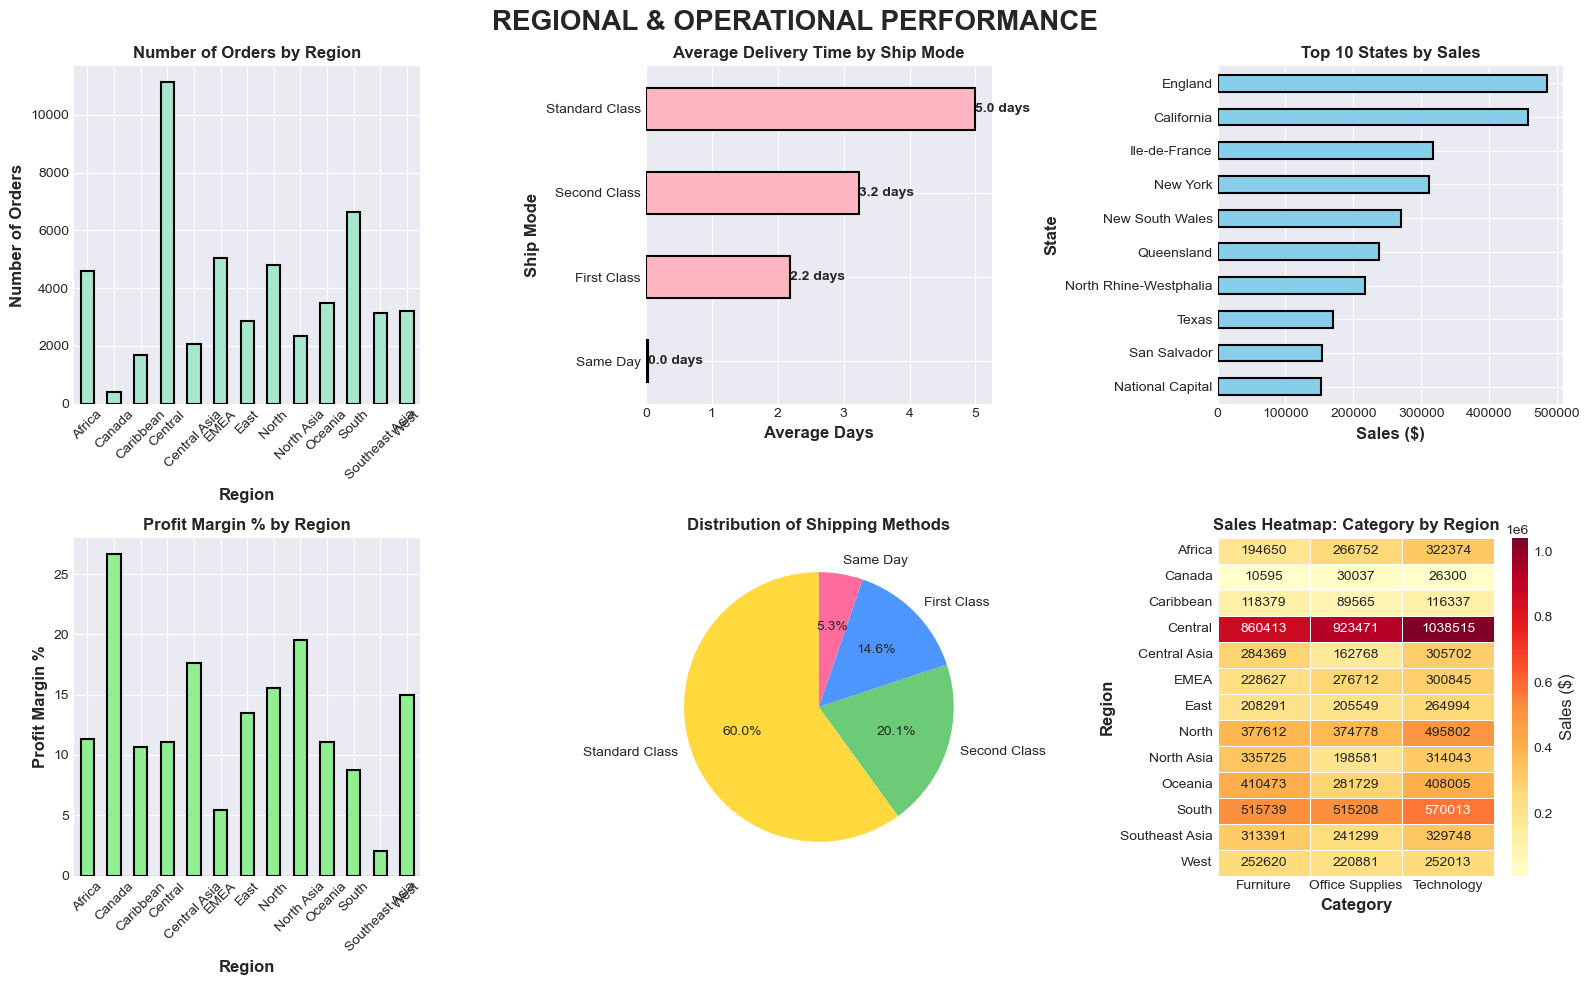

In [91]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('REGIONAL & OPERATIONAL PERFORMANCE', fontsize=20, fontweight='bold', y=0.98)

# Regional Sales Comparison
ax1 = plt.subplot(2, 3, 1)
region_data = df.groupby('region').agg({'sales': 'sum', 'profit': 'sum', 'order_id': 'count'})
region_data['order_id'].plot(kind='bar', color='#A8E6CF', ax=ax1, edgecolor='black', linewidth=1.5)
ax1.set_title('Number of Orders by Region', fontweight='bold', fontsize=12)
ax1.set_xlabel('Region', fontweight='bold')
ax1.set_ylabel('Number of Orders', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Delivery Time by Ship Mode
ax2 = plt.subplot(2, 3, 2)
delivery_data = df.groupby('ship_mode')['delivery_duration'].mean().sort_values()
delivery_data.plot(kind='barh', color='#FFB6C1', ax=ax2, edgecolor='black', linewidth=1.5)
ax2.set_title('Average Delivery Time by Ship Mode', fontweight='bold', fontsize=12)
ax2.set_xlabel('Average Days', fontweight='bold')
ax2.set_ylabel('Ship Mode', fontweight='bold')
for i, v in enumerate(delivery_data.values):
    ax2.text(v, i, f'{v:.1f} days', ha='left', va='center', fontweight='bold')

# Top 10 States by Sales
ax3 = plt.subplot(2, 3, 3)
state_sales = df.groupby('state')['sales'].sum().nlargest(10).sort_values()
state_sales.plot(kind='barh', color='#87CEEB', ax=ax3, edgecolor='black', linewidth=1.5)
ax3.set_title('Top 10 States by Sales', fontweight='bold', fontsize=12)
ax3.set_xlabel('Sales ($)', fontweight='bold')
ax3.set_ylabel('State', fontweight='bold')

# Regional Profit Margins
ax4 = plt.subplot(2, 3, 4)
region_margin = df.groupby('region').agg({'sales': 'sum', 'profit': 'sum'})
region_margin['Margin_%'] = (region_margin['profit'] / region_margin['sales'] * 100)
colors_margins = ['#90EE90' if x > 0 else '#FFB6B6' for x in region_margin['Margin_%'].values]
region_margin['Margin_%'].plot(kind='bar', color=colors_margins, ax=ax4, edgecolor='black', linewidth=1.5)
ax4.set_title('Profit Margin % by Region', fontweight='bold', fontsize=12)
ax4.set_xlabel('Region', fontweight='bold')
ax4.set_ylabel('Profit Margin %', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Orders by Ship Mode
ax5 = plt.subplot(2, 3, 5)
ship_mode_counts = df['ship_mode'].value_counts()
colors_ship = ['#FFD93D', '#6BCB77', '#4D96FF', '#FF6B9D']
ship_mode_counts.plot(kind='pie', colors=colors_ship, autopct='%1.1f%%', 
                      startangle=90, ax=ax5)
ax5.set_title('Distribution of Shipping Methods', fontweight='bold', fontsize=12)
ax5.set_ylabel('')

# Category Performance by Region (Heatmap)
ax6 = plt.subplot(2, 3, 6)
heatmap_data = df.groupby(['region', 'category'])['sales'].sum().unstack()
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            ax=ax6, cbar_kws={'label': 'Sales ($)'}, linewidths=0.5)
ax6.set_title('Sales Heatmap: Category by Region', fontweight='bold', fontsize=12)
ax6.set_xlabel('Category', fontweight='bold')
ax6.set_ylabel('Region', fontweight='bold')

plt.tight_layout()
plt.savefig('superstore_regional_operational.png', dpi=300, bbox_inches='tight')
print("✓ Saved: superstore_regional_operational.png")
plt.show()